In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("healthinsurance.csv")

In [3]:
data.head(5)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [13]:
data.describe()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
count,14604.000000,15000.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,0.489867,64.909600,30.266413,7.730533,1.129733,0.198133,45.160000,68.650133,0.777000,0.224133,18.662267,13401.437620
std,14.015966,0.499914,13.701935,6.122950,1.251250,1.228469,0.398606,25.930775,19.418515,0.416272,0.417024,10.429298,12148.239619
min,18.000000,0.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,0.000000,54.000000,25.700000,8.000000,0.000000,0.000000,23.000000,64.000000,1.000000,0.000000,10.000000,4846.900000
50%,40.000000,0.000000,63.000000,29.400000,8.000000,1.000000,0.000000,47.000000,71.000000,1.000000,0.000000,20.000000,9545.650000
75%,52.000000,1.000000,76.000000,34.400000,8.000000,2.000000,0.000000,67.000000,80.000000,1.000000,0.000000,28.000000,16519.125000
max,64.000000,1.000000,95.000000,53.100000,9.000000,5.000000,1.000000,90.000000,122.000000,1.000000,1.000000,34.000000,63770.400000


In [12]:
# Assuming 'data' is your DataFrame
high_bloodpressure = data[data['bloodpressure'] > 130]

# Display the filtered DataFrame
print(high_bloodpressure)


Empty DataFrame
Columns: [age, sex, weight, bmi, hereditary_diseases, no_of_dependents, smoker, city, bloodpressure, diabetes, regular_ex, job_title, claim]
Index: []


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [6]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
data['sex']= label_encoder.fit_transform(data['sex']) 
data['hereditary_diseases']= label_encoder.fit_transform(data['hereditary_diseases']) 
data['city']= label_encoder.fit_transform(data['city']) 
data['job_title']= label_encoder.fit_transform(data['job_title']) 

In [7]:
data.head(5)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,1,64,24.3,8,1,0,55,72,0,0,2,13112.6
1,49.0,0,75,22.6,8,1,0,5,78,1,1,16,9567.0
2,32.0,0,64,17.8,4,2,1,63,88,1,1,0,32734.2
3,61.0,0,53,36.4,8,1,1,64,72,1,0,10,48517.6
4,19.0,0,50,20.6,8,0,0,8,82,1,0,22,1731.7


In [8]:
data.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title', 'claim'],
      dtype='object')

In [15]:
# Assuming 1 represents 'Yes' and 0 represents 'No' for both columns
data['smoker_or_diabetes'] = (data['smoker'] | data['diabetes'])

# Display the updated DataFram
data.head()


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,smoker_or_diabetes
0,60.0,1,64,24.3,8,1,0,55,72,0,0,2,13112.6,0
1,49.0,0,75,22.6,8,1,0,5,78,1,1,16,9567.0,1
2,32.0,0,64,17.8,4,2,1,63,88,1,1,0,32734.2,1
3,61.0,0,53,36.4,8,1,1,64,72,1,0,10,48517.6,1
4,19.0,0,50,20.6,8,0,0,8,82,1,0,22,1731.7,1


C:\Users\thama\AppData\Local\Temp\ipykernel_24796\2348150054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col], y=data['smoker_or_diabetes'], palette=sns.color_palette("husl", unique_values))


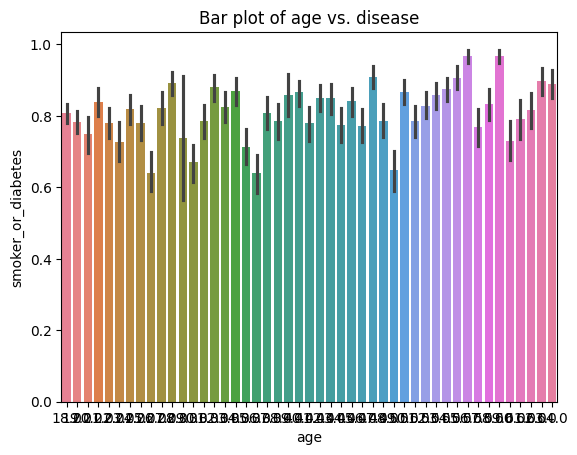

C:\Users\thama\AppData\Local\Temp\ipykernel_24796\2348150054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col], y=data['smoker_or_diabetes'], palette=sns.color_palette("husl", unique_values))


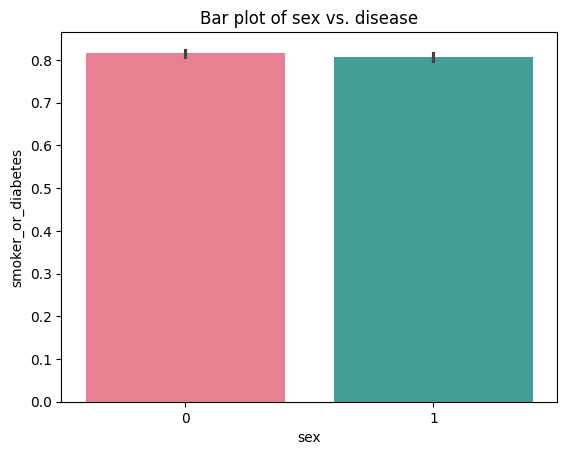

C:\Users\thama\AppData\Local\Temp\ipykernel_24796\2348150054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col], y=data['smoker_or_diabetes'], palette=sns.color_palette("husl", unique_values))


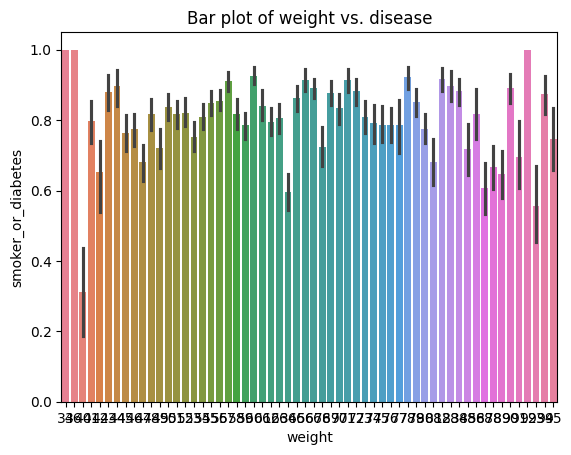

C:\Users\thama\AppData\Local\Temp\ipykernel_24796\2348150054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col], y=data['smoker_or_diabetes'], palette=sns.color_palette("husl", unique_values))


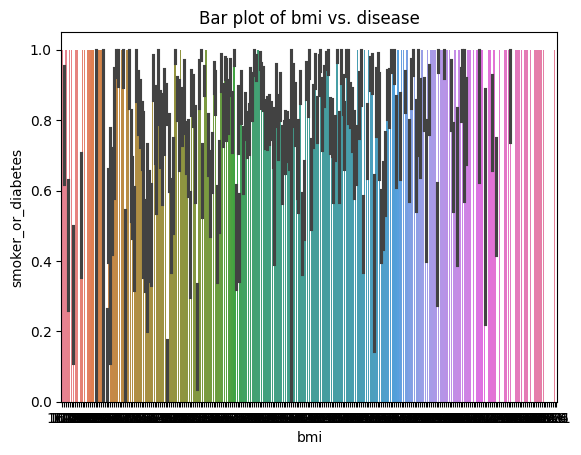

C:\Users\thama\AppData\Local\Temp\ipykernel_24796\2348150054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col], y=data['smoker_or_diabetes'], palette=sns.color_palette("husl", unique_values))


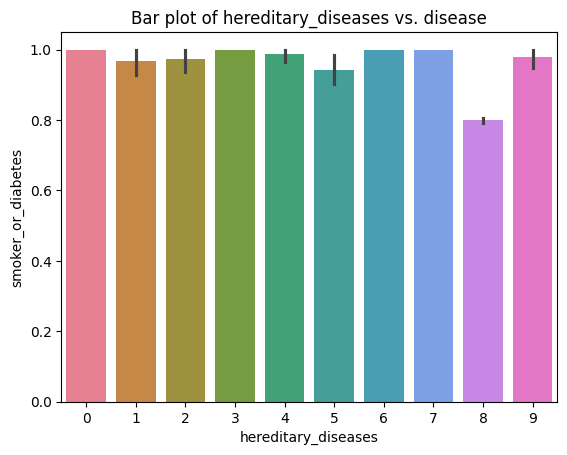

C:\Users\thama\AppData\Local\Temp\ipykernel_24796\2348150054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col], y=data['smoker_or_diabetes'], palette=sns.color_palette("husl", unique_values))


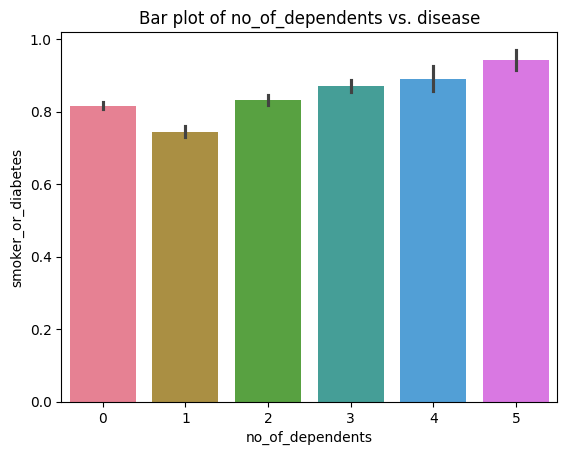

C:\Users\thama\AppData\Local\Temp\ipykernel_24796\2348150054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col], y=data['smoker_or_diabetes'], palette=sns.color_palette("husl", unique_values))


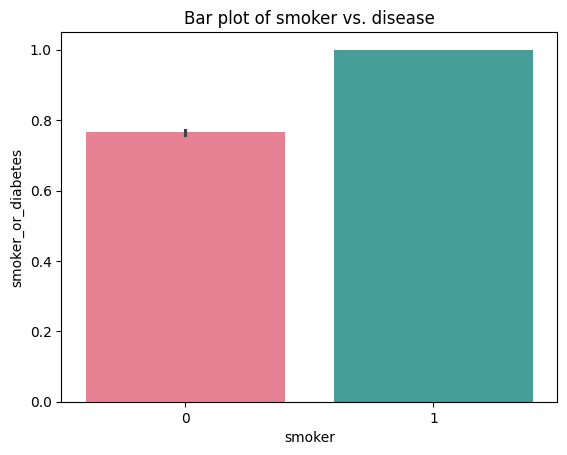

C:\Users\thama\AppData\Local\Temp\ipykernel_24796\2348150054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col], y=data['smoker_or_diabetes'], palette=sns.color_palette("husl", unique_values))


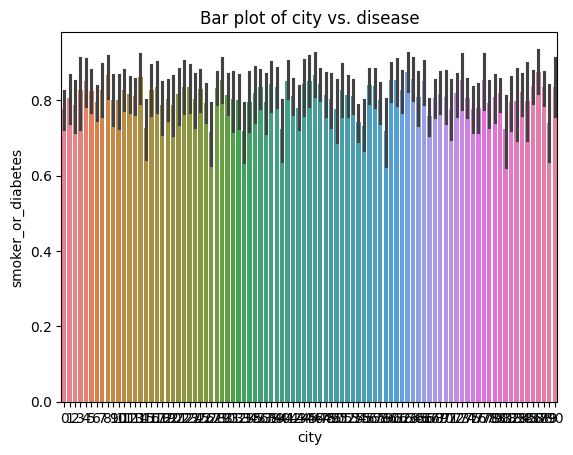

C:\Users\thama\AppData\Local\Temp\ipykernel_24796\2348150054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col], y=data['smoker_or_diabetes'], palette=sns.color_palette("husl", unique_values))


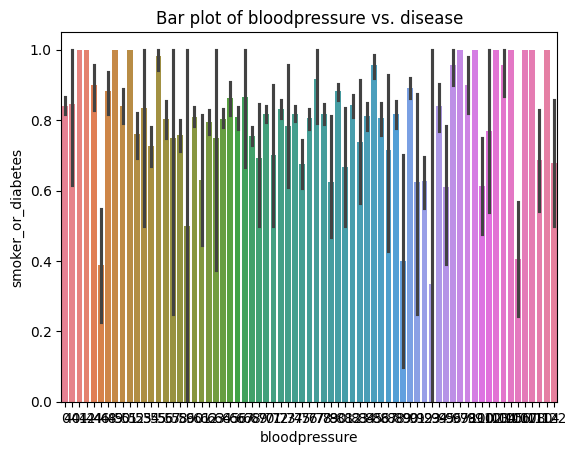

C:\Users\thama\AppData\Local\Temp\ipykernel_24796\2348150054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col], y=data['smoker_or_diabetes'], palette=sns.color_palette("husl", unique_values))


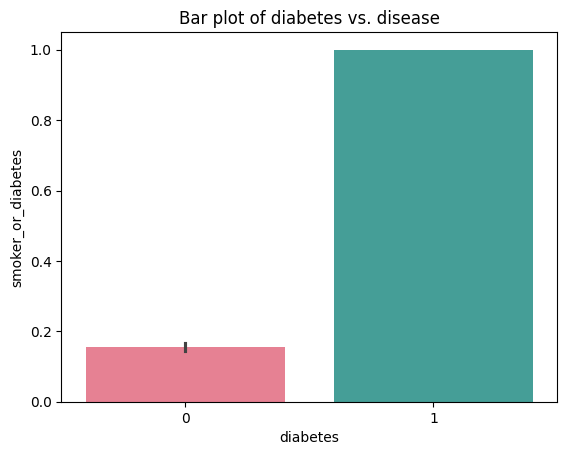

C:\Users\thama\AppData\Local\Temp\ipykernel_24796\2348150054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col], y=data['smoker_or_diabetes'], palette=sns.color_palette("husl", unique_values))


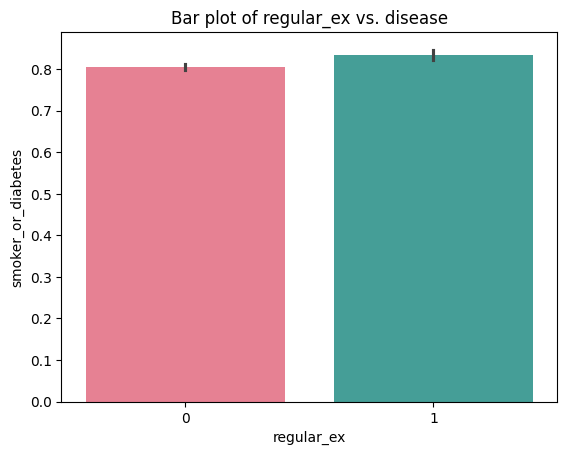

C:\Users\thama\AppData\Local\Temp\ipykernel_24796\2348150054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col], y=data['smoker_or_diabetes'], palette=sns.color_palette("husl", unique_values))


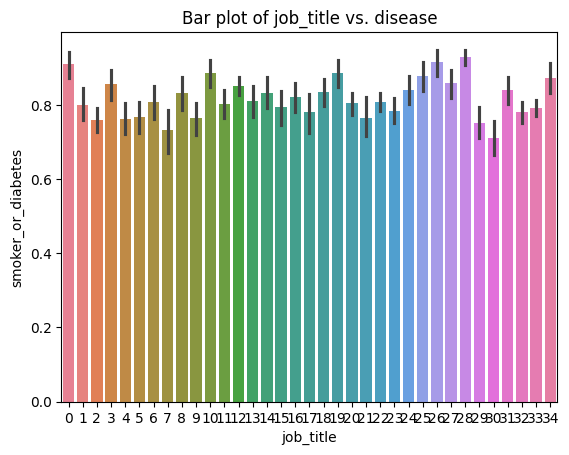

C:\Users\thama\AppData\Local\Temp\ipykernel_24796\2348150054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col], y=data['smoker_or_diabetes'], palette=sns.color_palette("husl", unique_values))


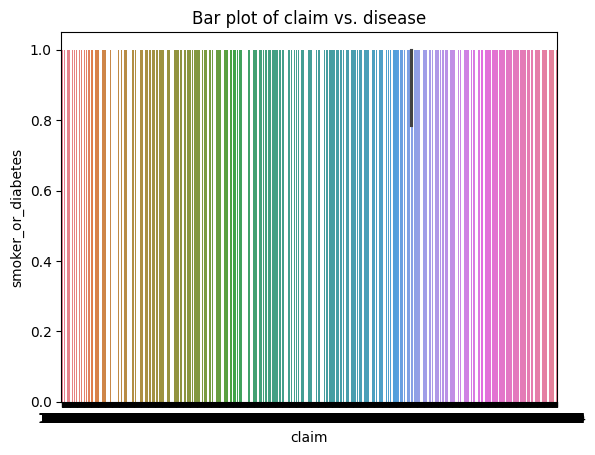

C:\Users\thama\AppData\Local\Temp\ipykernel_24796\2348150054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col], y=data['smoker_or_diabetes'], palette=sns.color_palette("husl", unique_values))


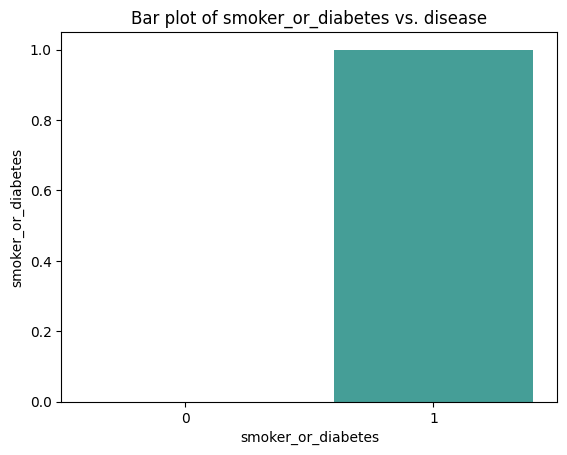

In [16]:
for col in data.columns:
    plt.figure() 
    unique_values = data[col].nunique()  
    sns.barplot(x=data[col], y=data['smoker_or_diabetes'], palette=sns.color_palette("husl", unique_values))  
    plt.title(f'Bar plot of {col} vs. disease') 
    plt.savefig(f'./insurance_eda/{col}_vs_disease.png')
    plt.show()  


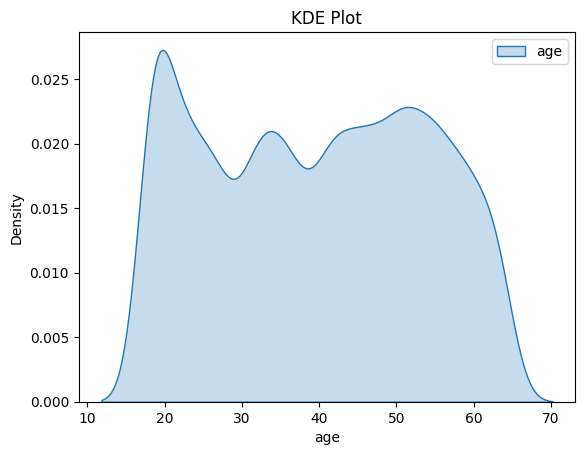

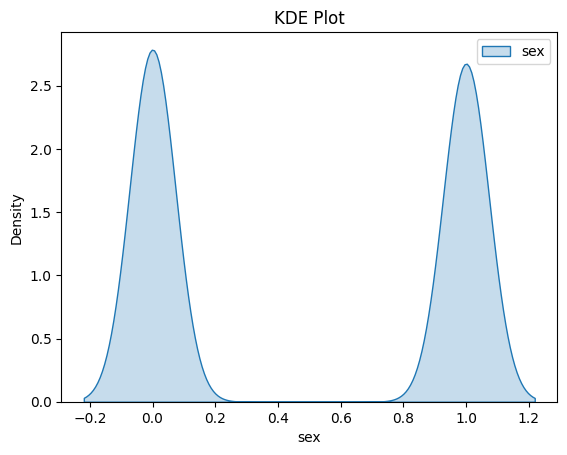

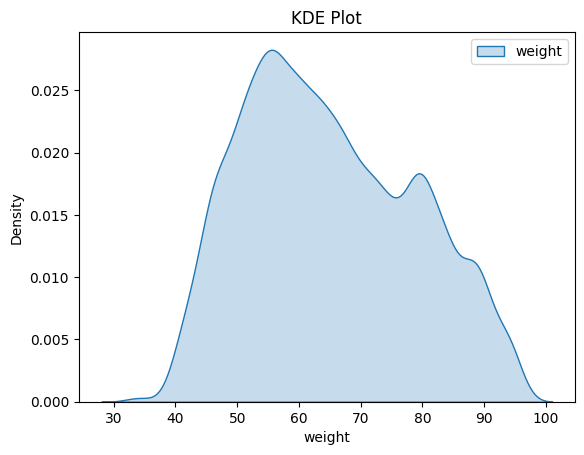

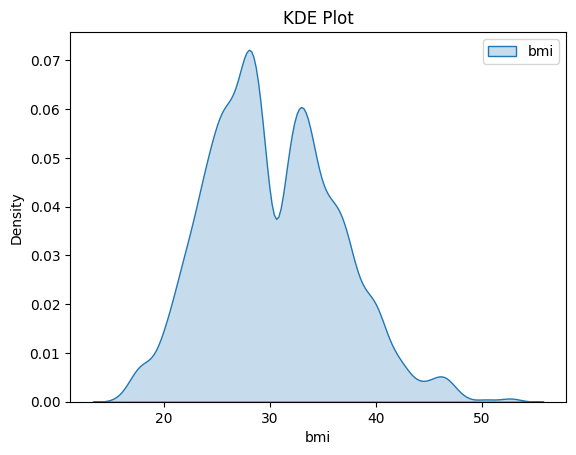

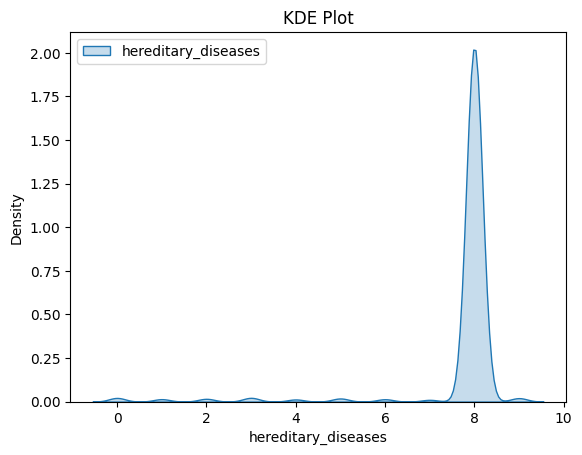

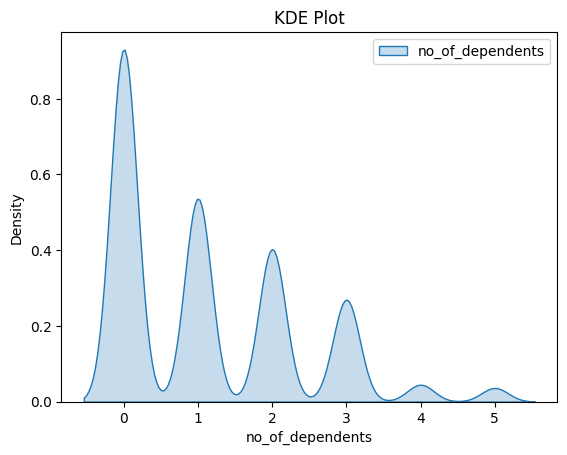

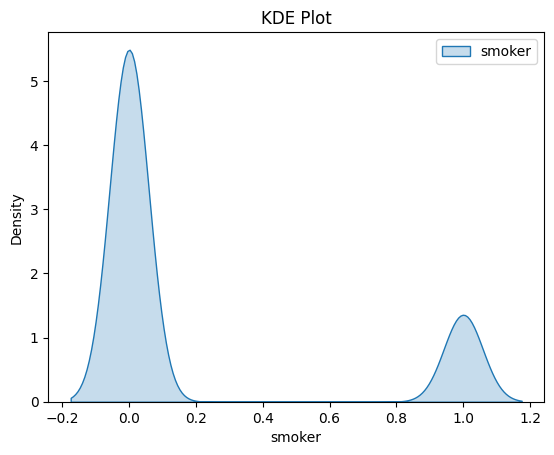

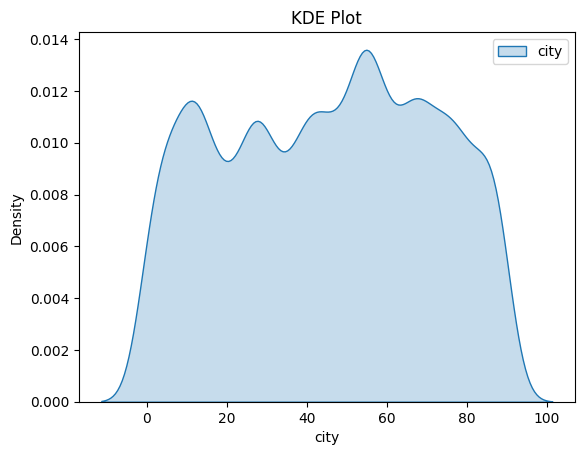

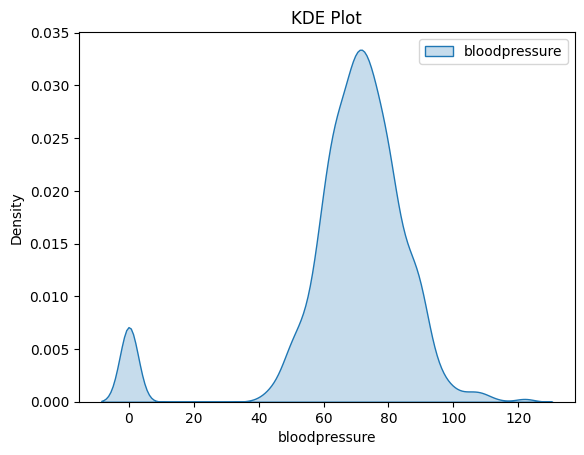

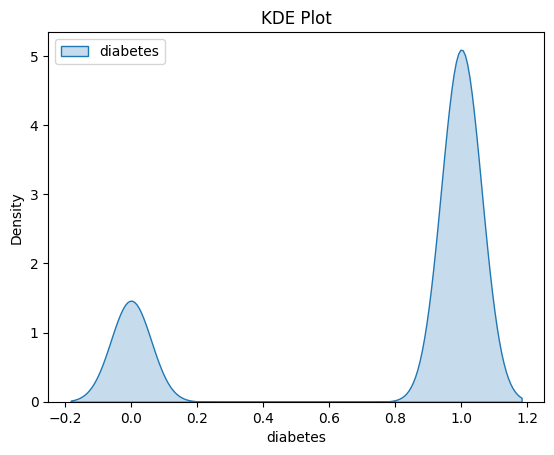

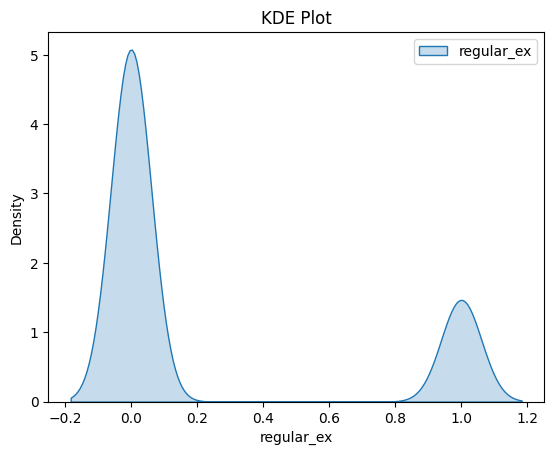

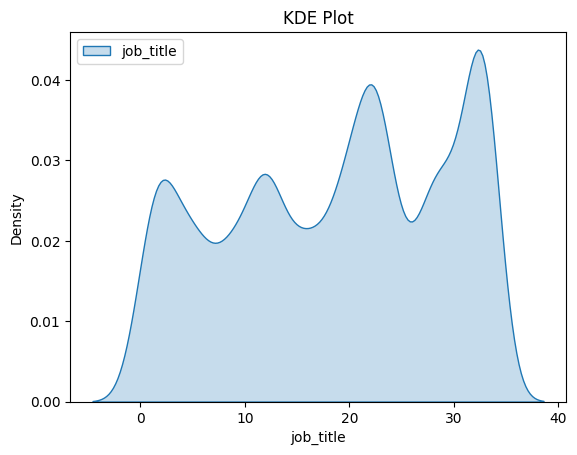

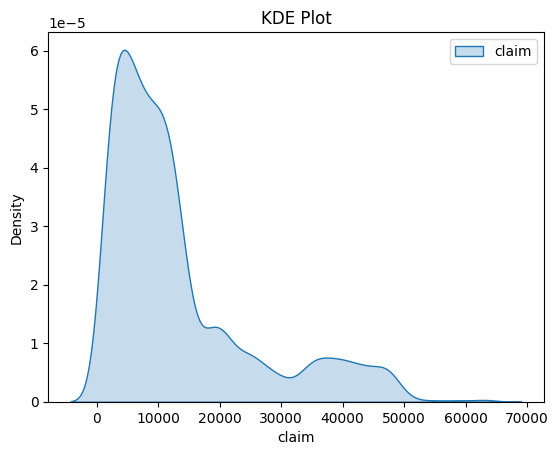

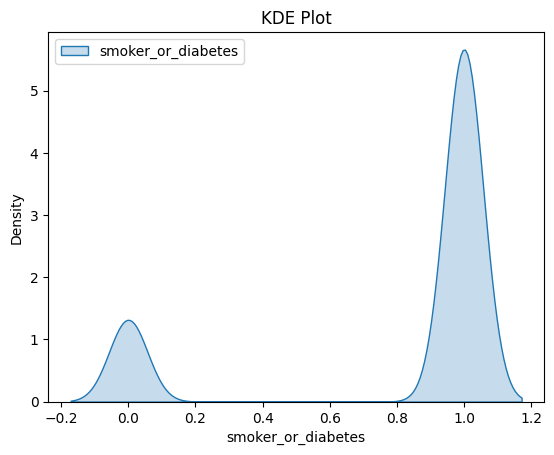

In [17]:
for i in data.columns:
    sns.kdeplot(data[i], fill=True, label=i)
    # Set labels and title
    # plt.xlabel('Age')
    plt.ylabel('Density')
    plt.title('KDE Plot')
    plt.legend()
    plt.savefig(f'./insurance_eda/{i}vsDisease.png')
    # Display the KDE plot
    plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  int64  
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  int64  
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  int64  
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  int64  
 12  claim                15000 non-null  float64
 13  smoker_or_diabetes   15000 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.6 MB


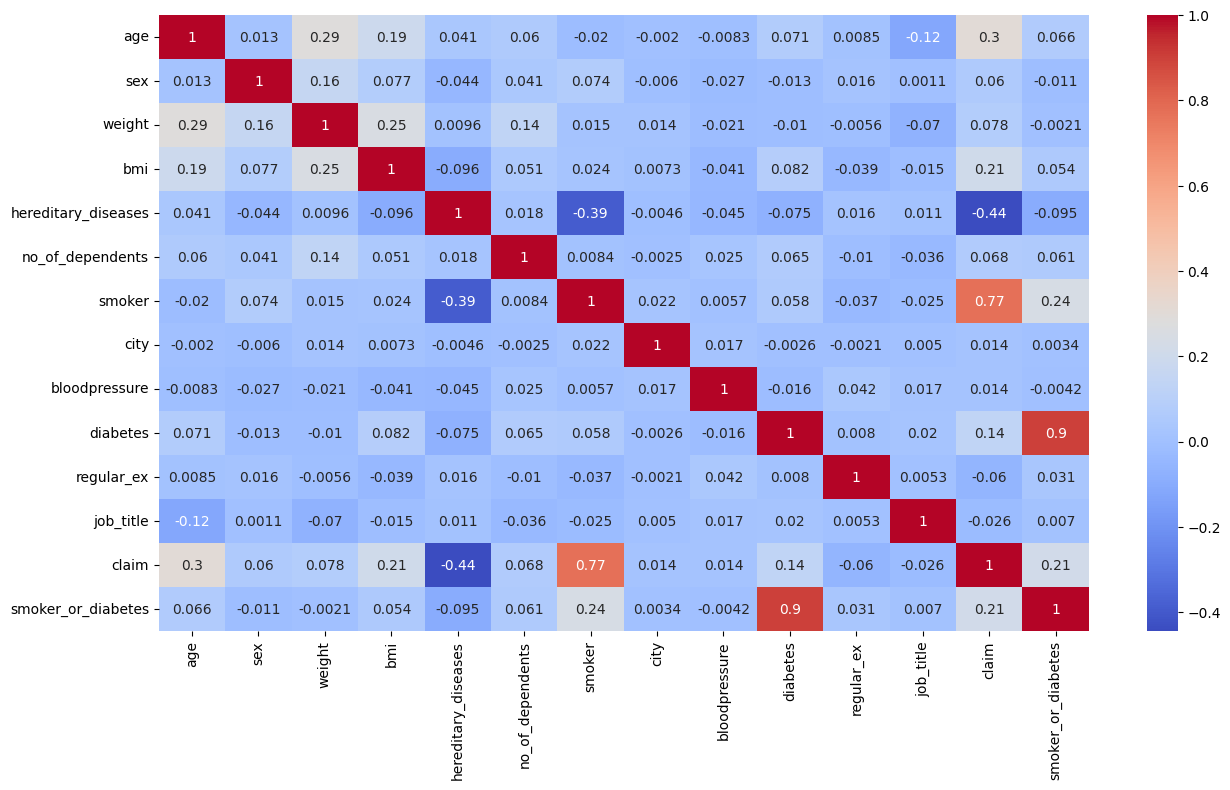

In [19]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.savefig(f'./insurance_eda/corr_2.png')  # Save the plot as an image file